# Kaggle Plant Seedling Classification 

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai.imports import *
from fastai.dataset import *
from fastai.dataloader import *
from fastai.conv_learner import *
from fastai.plots import *

In [5]:
PATH = '/home/ubuntu/workspace/data/iciar18/full_dataset/'

In [6]:
!ls {PATH} | wc -l

406


In [5]:
!ls {PATH}/train/ | head

Black-grass
Charlock
Cleavers
Common Chickweed
Common wheat
Fat Hen
Loose Silky-bent
Maize
Scentless Mayweed
Shepherds Purse


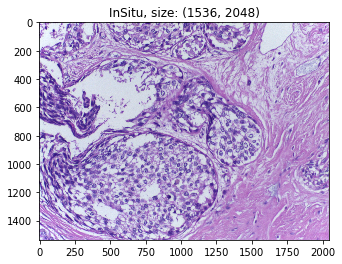

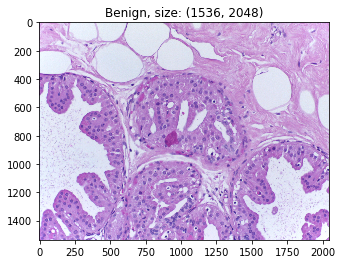

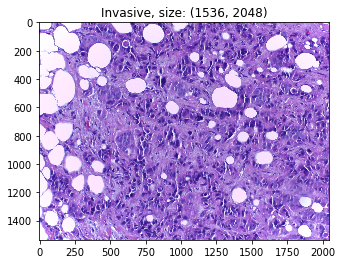

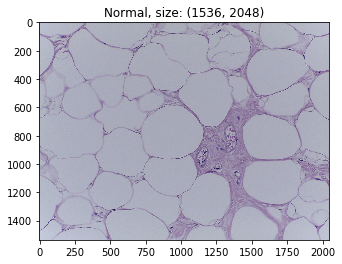

In [7]:
im_is = plt.imread(f'{PATH}is007.jpg')
im_b = plt.imread(f'{PATH}b015.jpg')
im_iv = plt.imread(f'{PATH}iv087.jpg')
im_n = plt.imread(f'{PATH}n055.jpg')
ims = [im_is, im_b, im_iv, im_n]
titles=['InSitu', 'Benign', 'Invasive', 'Normal']
for k, i in enumerate(ims):
    plt.title(titles[k]+', size: '+str(i.shape[:2]))
    plt.imshow(i)
    plt.show()
    
# ims = np.stack([im_is, im_b, im_iv, im_n])
# plots(ims, rows = 2, )


In [11]:
import pandas as pd

dftrain = pd.read_csv(f'{PATH}train_multi.csv')
dftrain

,filename,label
0,n001.jpg,Normal
1,n002.jpg,Normal
2,n003.jpg,Normal
3,n004.jpg,Normal
4,n005.jpg,Normal
5,n006.jpg,Normal
6,n007.jpg,Normal
7,n008.jpg,Normal
8,n009.jpg,Normal
9,n010.jpg,Normal


In [10]:
sizes = [plt.imread(f'{PATH}{im}').shape[0] for im in dftrain[0] ]

In [15]:
sizes_np = np.array(sizes)
np.where(sizes_np==200)

(array([1450, 2616, 4159, 4333]),)

(array([ 2920.,  1318.,   332.,   122.,    36.,    13.,     3.,     3.,     0.,     3.]),
 array([   49. ,   389.8,   730.6,  1071.4,  1412.2,  1753. ,  2093.8,  2434.6,  2775.4,  3116.2,  3457. ]),
 <a list of 10 Patch objects>)

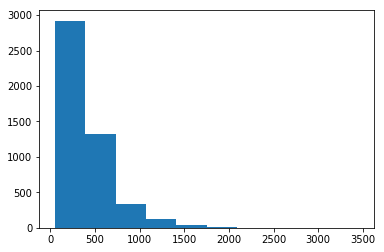

In [17]:
plt.hist(sizes_np)

In [19]:
print(f'Mean size of images: {sizes_np.mean()}')

Mean size of images: 370.7301052631579


In [11]:
arch=resnet50
bs=64
sz=224

In [31]:
def get_val_idxs(n_per_class, val_pct, nclasses):
    v_idxs = get_cv_idxs(n_per_class, val_pct=val_pct, seed=24)
    v_next_idxs = [v_idxs + i*100 for i in range(1, nclasses)]
    v_idxs = [v_idxs] + v_next_idxs
    return np.concatenate(v_idxs)

In [32]:
def get_data(arch, sz, bs, val_idxs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.1)
    csv_fname = PATH+'microscopy_ground_truth.csv'
   
    data = ImageClassifierData.from_csv(PATH, '', csv_fname, bs,tfms,val_idxs)
    return data

val_idxs = get_val_idxs(100, 0.2, 4)

# v2 = val_idxs + 100
# v3 = val_idxs + 200
# v4 = val_idxs + 300
# val_idxs, v2, v3, v4
# vf = np.concatenate((val_idxs, v2, v3, v4))
len(val_idxs), val_idxs
# data = get_data(arch, sz, bs, vf)
# learner = ConvLearner.pretrained(arch, data, precompute=True, opt_fn=optim.Adam)
# learner.lr_find()
# learner.sched.plot()

(80,
 array([ 26,  31,  37,  86,  76,  14,  88,  48,  71,  67,  13,  84,  58,  40,  75,  94,  20,  57,  61,  80,
        126, 131, 137, 186, 176, 114, 188, 148, 171, 167, 113, 184, 158, 140, 175, 194, 120, 157, 161, 180,
        226, 231, 237, 286, 276, 214, 288, 248, 271, 267, 213, 284, 258, 240, 275, 294, 220, 257, 261, 280,
        326, 331, 337, 386, 376, 314, 388, 348, 371, 367, 313, 384, 358, 340, 375, 394, 320, 357, 361, 380]))

In [23]:
data.bs

64

In [7]:
lrf=0.005
learner.fit(lrf, 3, cycle_len=1)

A Jupyter Widget

[ 0.       1.12075  0.7283   0.75804]                     
[ 1.       0.75456  0.48623  0.83369]                      
[ 2.       0.56702  0.39316  0.86016]                      



In [8]:
learner.fit(lrf, 3, cycle_len=1)

A Jupyter Widget

[ 0.       0.50786  0.39921  0.85474]                      
[ 1.       0.39086  0.33239  0.87327]                      
[ 2.       0.32985  0.33146  0.87557]                      



In [9]:
lr = np.array([lrf/50, lrf/10, lrf])
learner.unfreeze()
learner.fit(lr, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.53351  0.33076  0.87913]                      
[ 1.       0.48562  0.31661  0.8885 ]                      
[ 2.       0.41808  0.30027  0.89662]                      
[ 3.       0.46332  0.3258   0.88038]                      
[ 4.       0.40318  0.2885   0.8987 ]                      
[ 5.       0.35163  0.28574  0.89224]                      
[ 6.      0.3153  0.2707  0.9112]                          



In [10]:
learner.save('st224_res50_adam_lr005')

In [48]:
learner.load('st224_res50_adam_lr005')

In [39]:
log_preds,y = learner.TTA()

In [42]:
log_preds.shape, y.shape

((5, 949, 12), (949,))

In [43]:
l_p1 = np.mean(log_preds, axis=0)
l_p1.shape

(949, 12)

0.930453108535

[[ 39   0   0   0   2   1  25   0   0   0   0   0]
 [  0  77   1   0   1   0   0   0   0   0   0   0]
 [  0   1  55   0   0   0   0   0   1   0   0   0]
 [  0   0   0 121   0   2   1   0   0   1   0   0]
 [  0   0   0   0  31   2   1   0   0   0   0   1]
 [  0   1   0   0   0  78   1   0   0   0   0   0]
 [  5   0   0   0   0   0 135   0   0   0   0   0]
 [  0   1   0   0   1   0   0  43   0   0   0   0]
 [  0   0   0   0   0   0   0   0  94   1   0   0]
 [  0   0   0   0   0   0   0   0   3  36   2   0]
 [  0   0   2   0   0   0   0   0   1   0  95   0]
 [  0   0   0   0   0   8   0   0   0   0   0  79]]


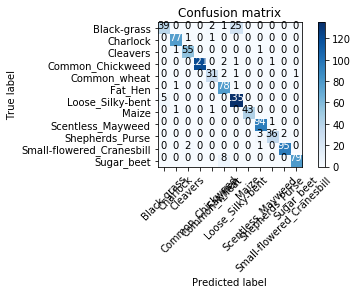

In [44]:
# log_preds,y = learner.predict_with_targs()
preds = np.argmax(l_p1, axis=1)
probs = np.exp(log_preds[:,1])
print(accuracy(l_p1, y))
print()
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm, data.classes)


In [47]:
learner.fit(lr, 3, cycle_len=1)

A Jupyter Widget

[ 0.       0.34813  0.27932  0.90057]                      
[ 1.       0.34364  0.26986  0.90391]                      
[ 2.       0.34367  0.28231  0.89953]                      



In [10]:
learner.save('st224_res50_adam')

In [84]:
learner.load('st224_res50_adam')

In [85]:
lr = np.array([lrf/50, lrf/10, lrf])

learner.fit(lr, 3, cycle_len=1, cycle_mult=2)


A Jupyter Widget


 12%|█▏        | 7/60 [00:06<00:49,  1.07it/s, loss=0.31] 

 13%|█▎        | 8/60 [00:06<00:42,  1.21it/s, loss=0.31]

Exception in thread Thread-75:
Traceback (most recent call last):
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration




100%|██████████| 60/60 [00:36<00:00,  1.64it/s, loss=0.413]
                                                           [ 0.       0.41312  0.3556   0.89015]

100%|██████████| 60/60 [00:36<00:00,  1.63it/s, loss=0.418]
                                                           [ 1.       0.41752  0.35015  0.88204]

 27%|██▋       | 16/60 [00:11<00:32,  1.34it/s, loss=0.392]


100%|██████████| 60/60 [00:36<00:00,  1.64it/s, loss=0.349]
                                                           [ 2.       0.34906  0.3037   0.89684]

100%|██████████| 60/60 [00:37<00:00,  1.62it/s, loss=0.375]
                                                           [ 3.       0.37469  0.44108  0.83642]

 40%|████      | 24/60 [00:16<00:25,  1.43it/s, loss=0.389]


100%|██████████| 60/60 [00:36<00:00,  1.64it/s, loss=0.385]
                                                           [ 4.       0.38509  0.32497  0.87704]

100%|██████████| 60/60 [00:37<00:00,  1.61it/s, loss=0.325]
                                                           [ 5.       0.32471  0.26274  0.90204]

 53%|█████▎    | 32/60 [00:20<00:18,  1.54it/s, loss=0.301]


100%|██████████| 60/60 [00:36<00:00,  1.64it/s, loss=0.285]
                                                           [ 6.       0.28492  0.25115  0.90747]



In [80]:
learner.save('st224_res50_adam005_wd')

In [99]:
learner.load('st224_res50_adam005_wd')

In [96]:
learner.opt_fn=optim.SGD

In [100]:
lr = np.array([0.001/9, 0.001/3, 0.001])
learner.fit(lr, 2, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.24528  0.25572  0.91142]                      
[ 1.       0.25662  0.26526  0.90704]                      
[ 2.       0.24898  0.26292  0.91433]                      



In [98]:
learner.fit(lr, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.25158  0.26398  0.91433]                      
[ 1.       0.23817  0.26015  0.91433]                      
[ 2.       0.25007  0.26114  0.91537]                      
[ 3.       0.24765  0.25977  0.91433]                      
[ 4.       0.23989  0.26024  0.91433]                      
[ 5.       0.24847  0.25612  0.9112 ]                      
[ 6.       0.26098  0.26155  0.9112 ]                      



In [77]:
lr = np.array([0.01/90, 0.01/30, 0.01])

0.930453108535 0.199031044442                

[[ 37   0   0   0   1   1  28   0   0   0   0   0]
 [  0  77   0   0   1   0   0   0   0   1   0   0]
 [  0   1  54   0   0   0   0   0   1   1   0   0]
 [  0   0   0 123   0   1   1   0   0   0   0   0]
 [  0   0   0   0  33   0   1   0   1   0   0   0]
 [  0   1   0   0   0  79   0   0   0   0   0   0]
 [  4   0   0   0   0   0 136   0   0   0   0   0]
 [  0   1   0   0   0   0   0  44   0   0   0   0]
 [  0   0   1   1   0   0   0   0  91   2   0   0]
 [  0   0   0   2   0   1   0   0   3  34   1   0]
 [  0   0   1   0   0   0   0   0   2   0  95   0]
 [  0   0   0   0   0   7   0   0   0   0   0  80]]


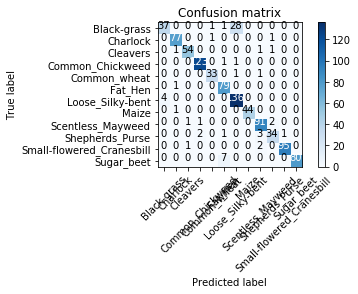

In [91]:
log_preds,y = learner.TTA()
# log_preds = np.mean(log_preds, axis=0)
preds = np.argmax(log_preds, axis=1)
probs = np.exp(log_preds[:,1])
print(accuracy(log_preds, y), metrics.log_loss(y, np.exp(log_preds)))
print()
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm, data.classes)


In [60]:
learner.fit(lr, 3, wds=wds, use_wd_sched=True, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.30578  0.29168  0.8987 ]                      
[ 1.       0.32673  0.29305  0.90621]                      
[ 2.       0.30555  0.28114  0.90079]                      
[ 3.       0.34796  0.33653  0.88099]                      
[ 4.       0.33662  0.28263  0.90287]                      
[ 5.       0.29328  0.2614   0.9139 ]                      
[ 6.       0.26095  0.25454  0.9112 ]                      



In [12]:
lr = np.array([lrf/100, lrf/10, lrf])
learner.unfreeze()
learner.fit(lr, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.47517  0.34603  0.88308]                      
[ 1.       0.45438  0.32804  0.88078]                      
[ 2.       0.41166  0.31339  0.89267]                      
[ 3.       0.41775  0.30524  0.88746]                      
[ 4.       0.40787  0.31618  0.87787]                      
[ 5.       0.38274  0.28561  0.89059]                      
[ 6.       0.35894  0.28418  0.89349]                      



In [13]:
learner.fit(lr, 4, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.35388  0.27898  0.89662]                      
[ 1.       0.39045  0.27493  0.89953]                      
[ 2.       0.34115  0.27581  0.88494]                      
[ 3.       0.34775  0.28512  0.89849]                      
[ 4.       0.32788  0.26767  0.89245]                      
[ 5.       0.30279  0.25984  0.90474]                      
[ 6.       0.30314  0.25509  0.90829]                      
[ 7.       0.31833  0.27744  0.89601]                      
[ 8.       0.32571  0.26672  0.90434]                      
[ 9.       0.31051  0.26192  0.90912]                      
[ 10.        0.30367   0.24713   0.91016]                  
[ 11.        0.27843   0.24703   0.90912]                  
[ 12.        0.27864   0.25039   0.90495]                  
[ 13.        0.27191   0.24416   0.91016]                  
[ 14.        0.26299   0.24926   0.90912]                  



In [14]:
lr = np.array([lrf/18, lrf/6, lrf])
learner.fit(lr, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.27536  0.25865  0.90391]                      
[ 1.       0.28528  0.25521  0.90786]                      
[ 2.       0.28283  0.26084  0.89849]                      
[ 3.       0.29241  0.26815  0.89163]                      
[ 4.       0.28044  0.24834  0.90934]                      
[ 5.       0.27442  0.24262  0.9135 ]                      
[ 6.       0.25898  0.24224  0.9135 ]                      



In [15]:
learner.save('start224_res50')

In [16]:
lr = np.array([lrf/9, lrf/3, lrf])
# learner.unfreeze()
learner.fit(lr, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.25739  0.24517  0.9135 ]                      
[ 1.       0.26846  0.25463  0.90704]                      
[ 2.       0.25554  0.23688  0.9112 ]                      
[ 3.       0.26149  0.25223  0.90704]                      
[ 4.       0.25763  0.25942  0.89037]                      
[ 5.       0.2509   0.25389  0.90474]                      
[ 6.       0.23884  0.25473  0.90495]                      



In [5]:
learner.save("32bs_224sz_res34")

NameError: name 'learner' is not defined

In [28]:
learner.fit(lr, 4, cycle_len=1, cycle_mult=2) # x2

A Jupyter Widget

[ 0.       0.25925  0.28451  0.89788]                      
[ 1.       0.28186  0.28728  0.90204]                      
[ 2.       0.26952  0.27937  0.90851]                      
[ 3.       0.26872  0.3156   0.89497]                      
[ 4.       0.27037  0.28446  0.90413]                      
[ 5.       0.2577   0.28029  0.90204]                      
[ 6.       0.24919  0.27963  0.90122]                      
[ 7.       0.27173  0.28719  0.90413]                      
[ 8.       0.27148  0.29543  0.9033 ]                      
[ 9.       0.27088  0.28842  0.90747]                      
[ 10.        0.26515   0.26947   0.90309]                  
[ 11.        0.25154   0.26656   0.90664]                  
[ 12.        0.23192   0.26665   0.90977]                  
[ 13.        0.23037   0.26917   0.90538]                  
[ 14.        0.24048   0.27092   0.90204]                  



In [ ]:
log_preds,y = learner.TTA()
metrics.log_loss(y,np.exp(log_preds)), accuracy(log_preds,y)

 25%|██▌       | 1/4 [00:16<00:48, 16.13s/it]

In [7]:
learner.unfreeze()
learner.load('224_res101')

In [8]:
learner.set_data(get_data(arch, 340, bs, val_idxs))

In [9]:
learner.freeze()
learner.precompute=True

A Jupyter Widget

 90%|█████████ | 54/60 [02:06<00:14,  2.34s/it, loss=1.55] 

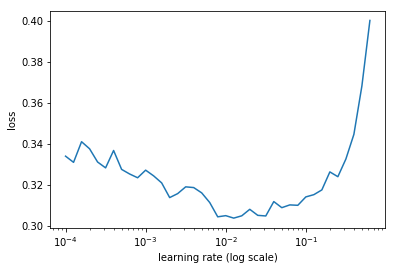

In [10]:
learner.lr_find()
learner.sched.plot()

In [11]:
learner.precompute=True

In [12]:
lrf=0.01
learner.fit(lrf, 3, cycle_len=1)

A Jupyter Widget


 85%|████████▌ | 51/60 [00:01<00:00, 40.99it/s, loss=0.165]
                                                           [ 0.       0.16471  0.27799  0.90621]

 83%|████████▎ | 50/60 [00:01<00:00, 39.48it/s, loss=0.147]
                                                           [ 1.       0.14699  0.27136  0.90538]

 80%|████████  | 48/60 [00:01<00:00, 37.33it/s, loss=0.137]
                                                           [ 2.       0.13712  0.2672   0.90725]


In [13]:
learner.fit(lrf, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget


 77%|███████▋  | 46/60 [00:01<00:00, 36.54it/s, loss=0.119]
                                                           [ 0.       0.1191   0.27914  0.91246]

 83%|████████▎ | 50/60 [00:01<00:00, 39.15it/s, loss=0.128]
                                                           [ 1.       0.12751  0.2819   0.90517]

 93%|█████████▎| 56/60 [00:01<00:00, 44.12it/s, loss=0.113]
                                                           [ 2.       0.11345  0.2784   0.90725]

 58%|█████▊    | 35/60 [00:01<00:00, 31.63it/s, loss=0.114]


 85%|████████▌ | 51/60 [00:01<00:00, 40.44it/s, loss=0.112]
                                                           [ 3.       0.11199  0.27673  0.91038]

 97%|█████████▋| 58/60 [00:01<00:00, 46.05it/s, loss=0.103]
                                                           [ 4.       0.10251  0.27016  0.90829]

 83%|████████▎ | 50/60 [00:01<00:00, 39.56it/s, loss=0.0929]
                                                            [ 5.       0.09293  0.27394  0.91268]

  2%|▏         | 1/60 [00:00<00:17,  3.30it/s, loss=0.0937]
                                                          ]
 12%|█▏        | 7/60 [00:00<00:03, 13.31it/s, loss=0.0926]

Exception in thread Thread-6:
Traceback (most recent call last):
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration
Exception in thread Thread-7:
Traceback (most recent call last):
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: 

[ 6.       0.08639  0.27424  0.90851]                       



In [14]:
log_preds,y = learner.TTA()
accuracy(log_preds,y), metrics.log_loss(y, np.exp(log_preds))

(0.90832455216016861, 0.2742542118787154)

In [ ]:
lrf=0.01
lr = np.array([lrf/100, lrf/10, lrf])
learner.unfreeze()
learner.fit(lr, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.3957   0.27334  0.91103]                      
[ 1.       0.26607  0.18393  0.93021]                      
[ 2.       0.18817  0.15591  0.94271]                      
[ 3.       0.15548  0.15155  0.95208]                      
[ 4.       0.13027  0.13175  0.95417]                      
 30%|███       | 18/60 [00:48<01:52,  2.67s/it, loss=0.118]

In [9]:
learner.unfreeze()
learner.load('340_res101')

In [19]:
y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
 

In [20]:
# log_preds,y = learner.TTA()
preds = np.exp(log_preds)
print(accuracy(preds,y))
print(metrics.log_loss(y, preds))

AttributeError: 'bool' object has no attribute 'mean'

In [15]:

preds = np.argmax(log_preds, axis=1)
probs = np.exp(log_preds[:,1])
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm, data.classes)

ValueError: Found input variables with inconsistent numbers of samples: [949, 5]

In [12]:
lrf=0.01
learner.freeze()
learner.precompute=True
learner.fit(lrf, 3, cycle_len=1)

A Jupyter Widget

[ 0.       0.17116  0.24016  0.92288]                      
[ 1.       0.14201  0.26193  0.9135 ]                      
[ 2.       0.13275  0.25186  0.90934]                      



In [13]:
learner.fit(lrf, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.11134  0.26164  0.91224]                       
[ 1.       0.10963  0.24885  0.91454]                      
[ 2.       0.10329  0.24468  0.91663]                       
[ 3.       0.09216  0.24703  0.91893]                       
[ 4.       0.08807  0.25888  0.90912]                       
[ 5.       0.08118  0.25649  0.91871]                       
[ 6.       0.07448  0.25492  0.91663]                       



In [15]:
learner.unfreeze()
lr = np.array([lrf/100, lrf/10, lrf])
learner.fit(lr, 4, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.24008  0.26434  0.90934]                      
[ 1.       0.24374  0.26105  0.90725]                      
[ 2.       0.22199  0.25554  0.91038]                      
[ 3.       0.22219  0.25436  0.91142]                      
[ 4.       0.2264   0.24139  0.91559]                      
[ 5.       0.23114  0.24209  0.91871]                      
[ 6.       0.20829  0.23841  0.91454]                      
[ 7.       0.21202  0.27122  0.90122]                      
[ 8.       0.2302   0.25834  0.90747]                      
[ 9.       0.21466  0.26333  0.90621]                      
 20%|██        | 12/60 [00:22<01:28,  1.85s/it, loss=0.219]

KeyboardInterrupt: 

In [26]:
log_preds,y = learner.TTA()
accuracy(log_preds,y)

0.97365648050579556

[[ 55   0   0   1   0   0  11   0   0   0   0   0]
 [  0  79   0   0   0   0   0   0   0   0   0   0]
 [  0   0  57   0   0   0   0   0   0   0   0   0]
 [  0   0   0 125   0   0   0   0   0   0   0   0]
 [  0   0   0   0  33   1   0   0   0   0   0   1]
 [  0   0   0   0   0  79   0   0   0   0   0   1]
 [  6   0   0   0   0   0 134   0   0   0   0   0]
 [  0   1   0   0   0   0   0  44   0   0   0   0]
 [  0   0   0   0   0   0   0   0  94   1   0   0]
 [  0   0   0   0   0   0   0   0   0  41   0   0]
 [  0   0   0   0   0   0   0   1   0   0  97   0]
 [  0   1   0   0   0   0   0   0   0   0   0  86]]


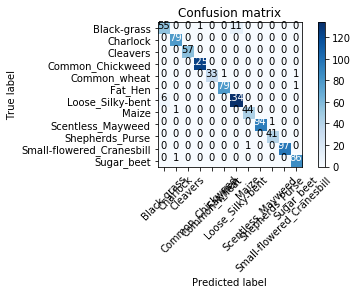

In [27]:
preds = np.argmax(log_preds, axis=1)
probs = np.exp(log_preds[:,1])
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm, data.classes)

In [28]:
res = learner.TTA(is_test=True)

In [31]:
log_preds= res[0]

In [32]:
preds = np.argmax(log_preds, axis=1)
probs = np.exp(log_preds[:,1])

In [46]:
classes = learner.data.classes

In [ ]:
classes = [c.replace('_', ' ') for c in cle]

In [38]:
fnames = [f.split('/')[-1] for f in learner.data.test_ds.fnames]

In [41]:
res = {}
for k, f in enumerate(fnames):
    res[f] = preds[classesk]

In [43]:
import pandas as pd
df = pd.DataFrame.from_dict(res, orient='index')

In [44]:
df.to_csv('pred.csv', header=False)